## MTA ridership data March 2020 - Jan 2022
### Transportation around New York City during several phases of the Covid-19 pandemic
#### Focusing on three methods of travel:
 - vehicular traffic from bridges and tunnels
 - subway ridership
 - bus ridership

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
ridership_file = "Resources/JAN_MTA_recent_ridership_data_20220103.csv"
ridership_df = pd.read_csv(ridership_file)

In [26]:
ridership_df.head()

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of 2019 Monthly Weekday/Saturday/Sunday Average,Metro-North: Total Estimated Ridership,Metro-North: % of 2019 Monthly Weekday/Saturday/Sunday Average,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day
0,1/3/22,2169857,41.4,849830,40.6,103000.0,35.0,84000.0,32.0,16437,55.20,692740,83.2
1,1/2/22,1220577,53.6,458780,48.7,49200.0,53.0,42600.0,53.0,8383,45.00,624655,88.8
2,1/1/22,1028836,44.5,342025,45.2,34000.0,30.0,30300.0,31.0,4904,57.50,498515,74.6
3,12/31/21,1629389,52.2,685526,56.8,96700.0,32.0,85200.0,32.0,11498,75.70,628305,73.7
4,12/30/21,2201870,50.8,901238,58.7,110100.0,38.0,90800.0,35.0,16177,65.70,804654,98.5


In [4]:
# check datatypes
ridership_df.dtypes

Date                                                               object
Subways: Total Estimated Ridership                                  int64
Subways:  % of Comparable Pre-Pandemic Day                        float64
Buses: Total Estimated Ridership                                    int64
Buses: % of Comparable Pre-Pandemic Day                           float64
LIRR: Total Estimated Ridership                                   float64
LIRR: % of 2019 Monthly Weekday/Saturday/Sunday Average           float64
Metro-North: Total Estimated Ridership                            float64
Metro-North: % of 2019 Monthly Weekday/Saturday/Sunday Average    float64
Access-A-Ride: Total Scheduled Trips                               object
Access-A-Ride: % of Comparable Pre-Pandemic Day                    object
Bridges and Tunnels: Total Traffic                                  int64
Bridges and Tunnels: % of Comparable Pre-Pandemic Day             float64
dtype: object

In [24]:
ridership_df.head(30)

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of 2019 Monthly Weekday/Saturday/Sunday Average,Metro-North: Total Estimated Ridership,Metro-North: % of 2019 Monthly Weekday/Saturday/Sunday Average,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day
0,1/3/22,2169857,41.4,849830,40.6,103000.0,35.0,84000.0,32.0,16437,55.20,692740,83.2
1,1/2/22,1220577,53.6,458780,48.7,49200.0,53.0,42600.0,53.0,8383,45.00,624655,88.8
2,1/1/22,1028836,44.5,342025,45.2,34000.0,30.0,30300.0,31.0,4904,57.50,498515,74.6
3,12/31/21,1629389,52.2,685526,56.8,96700.0,32.0,85200.0,32.0,11498,75.70,628305,73.7
4,12/30/21,2201870,50.8,901238,58.7,110100.0,38.0,90800.0,35.0,16177,65.70,804654,98.5
5,12/29/21,2170793,50.1,906047,59.0,105900.0,37.0,92600.0,36.0,16859,68.50,768653,94.1
6,12/28/21,2172577,50.2,951518,62.0,109900.0,38.0,89700.0,35.0,16736,68.00,764364,93.5
7,12/27/21,2011522,46.5,888468,57.9,108500.0,37.0,89400.0,34.0,14952,60.80,744547,91.1
8,12/26/21,1286440,51.0,518558,55.0,56500.0,60.0,51500.0,64.0,8744,48.80,673477,86.2
9,12/25/21,811926,46.6,329314,49.3,39500.0,35.0,31600.0,33.0,9021,61.00,582582,76.1


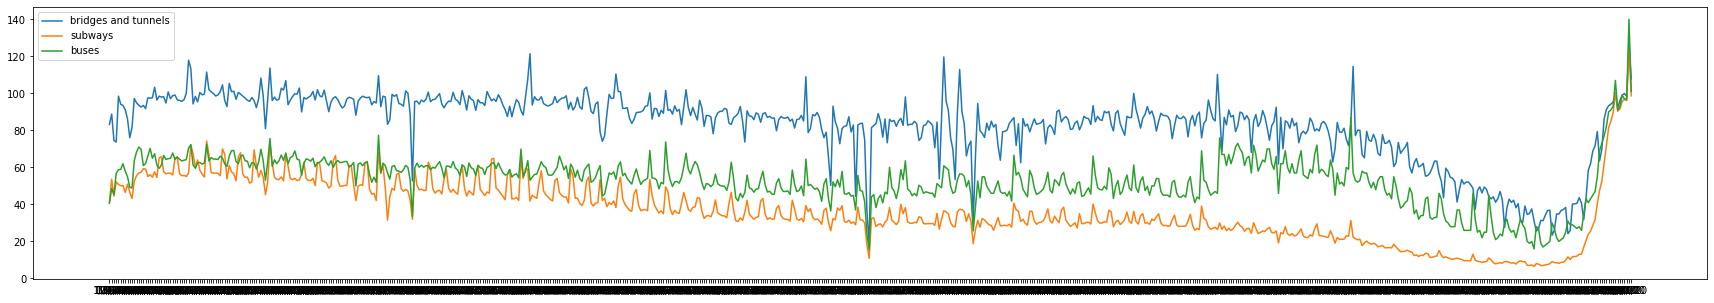

In [31]:
# Bridge and Tunnel data
x = ridership_df["Date"]
y = ridership_df["Bridges and Tunnels: % of Comparable Pre-Pandemic Day"]

bridge_tunnel, = plt.plot(x, y)

# Subway data
x1 = ridership_df["Date"]
y1 = ridership_df["Subways: % of Comparable Pre-Pandemic Day"]

# plots = plt.plot(x, y, x1, y1)

subway, = plt.plot(x1, y1)

# buses data
x2 = ridership_df["Date"]
y2 = ridership_df["Buses: % of Comparable Pre-Pandemic Day"]

buses, = plt.plot(x2, y2)

plt.legend([bridge_tunnel, subway, buses], 
           ["bridges and tunnels", "subways", "buses"], loc='best')
# plt.isinteractive()
         

plt.rcParams["figure.figsize"] = (30,5)
# plt.tight_layout()

plt.show()

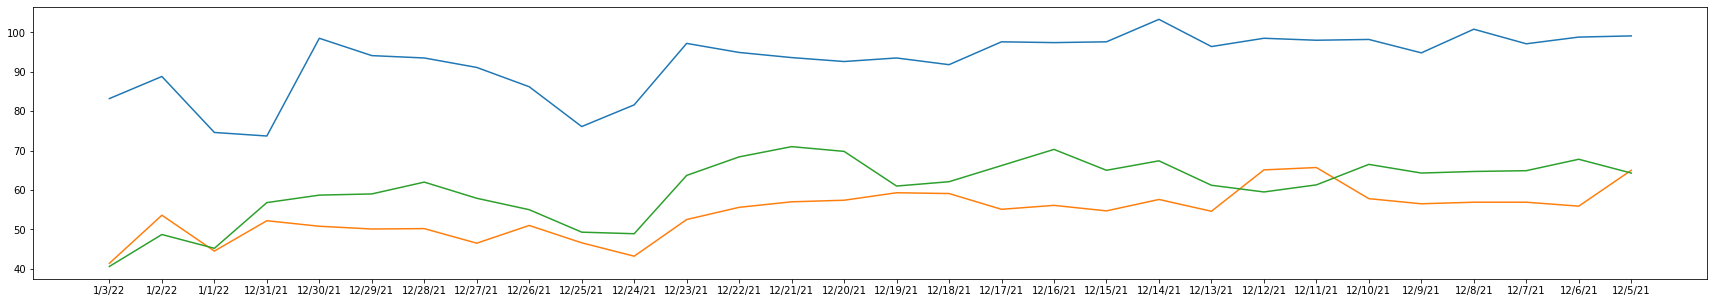

In [32]:
# view last 30 days
last_thirty = ridership_df.head(30)

# Bridge and Tunnel data
x = last_thirty["Date"]
y = last_thirty["Bridges and Tunnels: % of Comparable Pre-Pandemic Day"]

# plt.plot(x, y)


# Subway data
x1 = last_thirty["Date"]
y1 = last_thirty["Subways: % of Comparable Pre-Pandemic Day"]

# buses data
x2 = last_thirty["Date"]
y2 = last_thirty["Buses: % of Comparable Pre-Pandemic Day"]

plt.plot(x, y, x1,y1, x2, y2)


plt.rcParams["figure.figsize"] = (20,10)
# plt.tight_layout()

plt.show()

### Adjusting to chronological order
#### MTA data is in reverse chronological order, from Jan 2022 back to March 2020. While current ridership is of interest, on a chart the viewer expects the x-axis to be organized in chronological order. 
#### Because the date field is a string, I used the index to sort the data and return a new dataframe in chrono order. 

In [38]:
# sort by index to organize in chron order: 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html
chron_df = ridership_df.sort_index(axis=0, level=None, ascending=False, 
                                  inplace=False, kind='quicksort', 
                                  na_position='last', sort_remaining=True, 
                                  ignore_index=False)
chron_df

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of 2019 Monthly Weekday/Saturday/Sunday Average,Metro-North: Total Estimated Ridership,Metro-North: % of 2019 Monthly Weekday/Saturday/Sunday Average,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day
673,3/1/20,2214601,98.7,984900,101.0,NaN,NaN,NaN,NaN,19922,118.80,786961,107.8
672,3/2/20,5347055,123.9,2209100,140.0,NaN,NaN,NaN,NaN,30338,128.20,874620,127.5
671,3/3/20,5498556,96.1,2228600,97.0,NaN,NaN,NaN,NaN,32767,106.90,882175,98.3
670,3/4/20,5515945,96.8,2177200,97.0,NaN,NaN,NaN,NaN,34297,108.70,905558,99.9
669,3/5/20,5513656,95.6,2244500,99.0,NaN,NaN,NaN,NaN,33209,107.10,929298,99.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,12/30/21,2201870,50.8,901238,58.7,110100.0,38.0,90800.0,35.0,16177,65.70,804654,98.5
3,12/31/21,1629389,52.2,685526,56.8,96700.0,32.0,85200.0,32.0,11498,75.70,628305,73.7
2,1/1/22,1028836,44.5,342025,45.2,34000.0,30.0,30300.0,31.0,4904,57.50,498515,74.6
1,1/2/22,1220577,53.6,458780,48.7,49200.0,53.0,42600.0,53.0,8383,45.00,624655,88.8


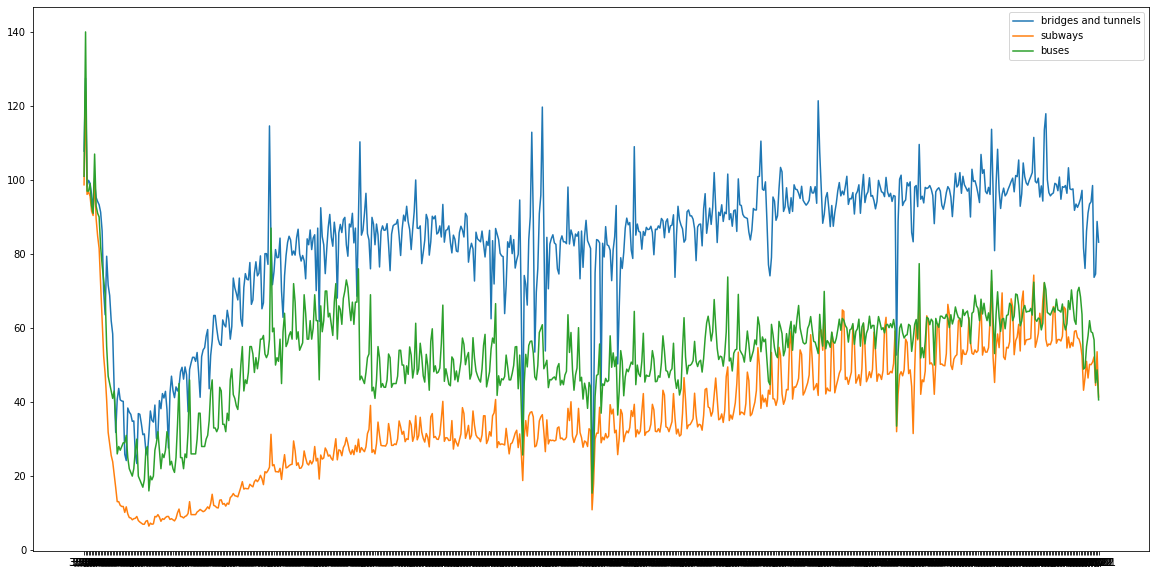

In [39]:
# Bridge and Tunnel data
x = chron_df["Date"]
y = chron_df["Bridges and Tunnels: % of Comparable Pre-Pandemic Day"]

bridge_tunnel, = plt.plot(x, y)

# Subway data
x1 = chron_df["Date"]
y1 = chron_df["Subways: % of Comparable Pre-Pandemic Day"]

# plots = plt.plot(x, y, x1, y1)

subway, = plt.plot(x1, y1)

# buses data
x2 = chron_df["Date"]
y2 = chron_df["Buses: % of Comparable Pre-Pandemic Day"]

buses, = plt.plot(x2, y2)

plt.legend([bridge_tunnel, subway, buses], 
           ["bridges and tunnels", "subways", "buses"], loc='best')
# plt.isinteractive()
         

plt.rcParams["figure.figsize"] = (30,5)
# plt.tight_layout()

plt.show()